#**CORRELATION & REGRESSION**

**Topik Statistika Terapan**


Teguh Prasetyo



## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

Dataset states terdiri dari 50 baris data (states sebagai unit observasi) dan 12 kolom (variables) dengan detail sebagai beikut :

**state:**  
the full state names (Alabama, Arizona, etc)

**region:**  
region name of the state (North Central, Northeast, South, West)

**abbrv:**  
2-letter abbreviations for the state names (ex: AL for Alabama, AK for Alaska, etc)

**division:**  
division name of the state (middle atlantic, mountain, pacific, etc)

**Population:**  
population estimate

**Income:**  
per capita income

**Illiteracy:**  
the opposite of literacy (percent of population)

**Life Exp:**  
life expectancy in years

**Murder:**  
murder and non-negligent manslaughter rate per 100,000 population

**HS Grad:**  
percent high-school graduates

**Frost:**  
mean number of days with minimum temperature below freezing

**Area:**  
land area in square miles

## **Data Preparation**

In [2]:
# define url (google drive)
url = 'https://drive.google.com/uc?id={}'.format('1xYI36hZ76zyMECTK0JaSpZdXQDyFRfHx')

# set digit number
pd.set_option('display.float_format', '{:.2f}'.format)

# load file csv from gdrive and save as dataframe
state = pd.read_csv(url)

In [3]:
# show column info
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       50 non-null     object 
 1   region      50 non-null     object 
 2   abbrv       50 non-null     object 
 3   division    50 non-null     object 
 4   population  50 non-null     int64  
 5   income      50 non-null     int64  
 6   illiteracy  50 non-null     float64
 7   life_exp    50 non-null     float64
 8   murder      50 non-null     float64
 9   hs_grad     50 non-null     float64
 10  frost       50 non-null     int64  
 11  area        50 non-null     int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 4.8+ KB


-------------------------------------------------------------------------------
**Comment**

Data memiliki 12 kolom yang terdiri dari 4 data bertipe kategorik yaitu state, region, abbrv, dan division, sedangkan data numerik terdiri dari population, income, illiteracy, life_exp, murder, hs_grad, frost, area

-------------------------------------------------------------------------------

In [4]:
state

,state,region,abbrv,division,population,income,illiteracy,life_exp,murder,hs_grad,frost,area
0,Alabama,South,AL,East South Central,3615,3624,2.10,69.05,15.10,41.30,20,50708
1,Alaska,West,AK,Pacific,365,6315,1.50,69.31,11.30,66.70,152,566432
2,Arizona,West,AZ,Mountain,2212,4530,1.80,70.55,7.80,58.10,15,113417
3,Arkansas,South,AR,West South Central,2110,3378,1.90,70.66,10.10,39.90,65,51945
4,California,West,CA,Pacific,21198,5114,1.10,71.71,10.30,62.60,20,156361
5,Colorado,West,CO,Mountain,2541,4884,0.70,72.06,6.80,63.90,166,103766
6,Connecticut,Northeast,CT,New England,3100,5348,1.10,72.48,3.10,56.00,139,4862
7,Delaware,South,DE,South Atlantic,579,4809,0.90,70.06,6.20,54.60,103,1982
8,Florida,South,FL,South Atlantic,8277,4815,1.30,70.66,10.70,52.60,11,54090
9,Georgia,South,GA,South Atlantic,4931,4091,2.00,68.54,13.90,40.60,60,58073


In [5]:
# show top 5 records
state.head(5)

,state,region,abbrv,division,population,income,illiteracy,life_exp,murder,hs_grad,frost,area
0,Alabama,South,AL,East South Central,3615,3624,2.10,69.05,15.10,41.30,20,50708
1,Alaska,West,AK,Pacific,365,6315,1.50,69.31,11.30,66.70,152,566432
2,Arizona,West,AZ,Mountain,2212,4530,1.80,70.55,7.80,58.10,15,113417
3,Arkansas,South,AR,West South Central,2110,3378,1.90,70.66,10.10,39.90,65,51945
4,California,West,CA,Pacific,21198,5114,1.10,71.71,10.30,62.60,20,156361


-------------------------------------------------------------------------------
**Comment**

Unit observasi adalah USA states, dengan kolom state dan abbrv sebagai id observasi, setiap state hanya terasosiasi dengan satu region dan satu division. Kolom lainnya berisi data numerik untuk setiap unit observasi.

-------------------------------------------------------------------------------

### Handling Outliers

Keberadaan outliers pada data, khususnya pada variabel dependen (Y) sangat mempengaruhi kualitas hasil analisis regresi. Hal tersebut disebabkan bahwsa analisis regresi sederhana mengasumsikan variabel dependen menyebar normal. Dalam contoh kasus ini, metode data preprocessing yang digunakan adalah mendeteksi keberadaan outlier dan melakukan penghapusan atas kolom data yang terdeteksi sebagai outlier. Untuk contoh lain, outlier handling dapat dilakukan dengan beberapa cara antara lain: do nothing (apabila outlier memang mencerminkan kondisi di lapangan), delete (apabila outlier kemungkinan besar dari kesalahan manusia), atau Imputation (dengan replace nilai berdasarkan metode tertentu, misal dengan nilai mean atau median) 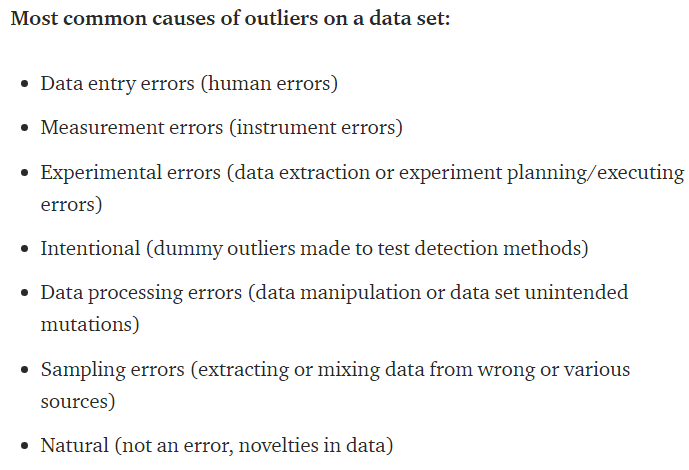

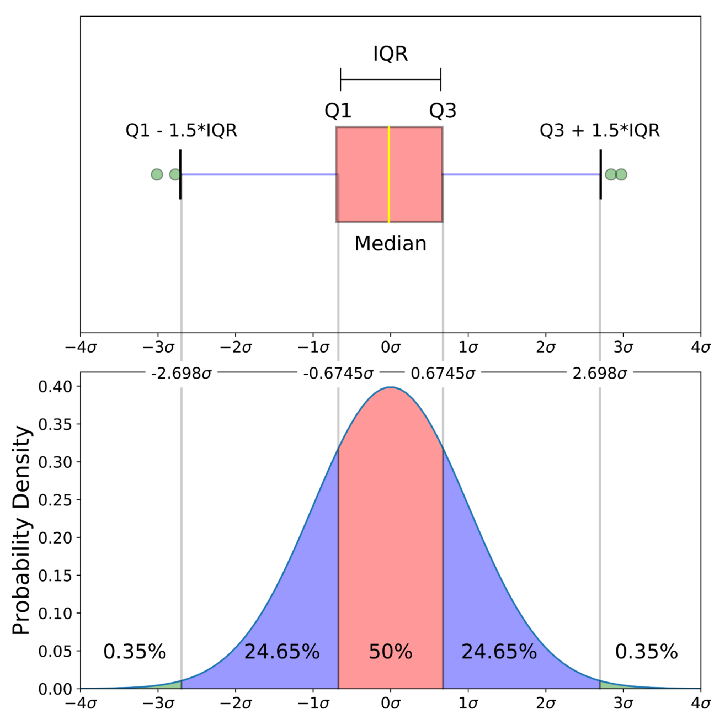

Jenis outliers ada 4 jika ditinjau dari keberadaannya relatif terhadap variabel dependen (Y) maupun independen (X)

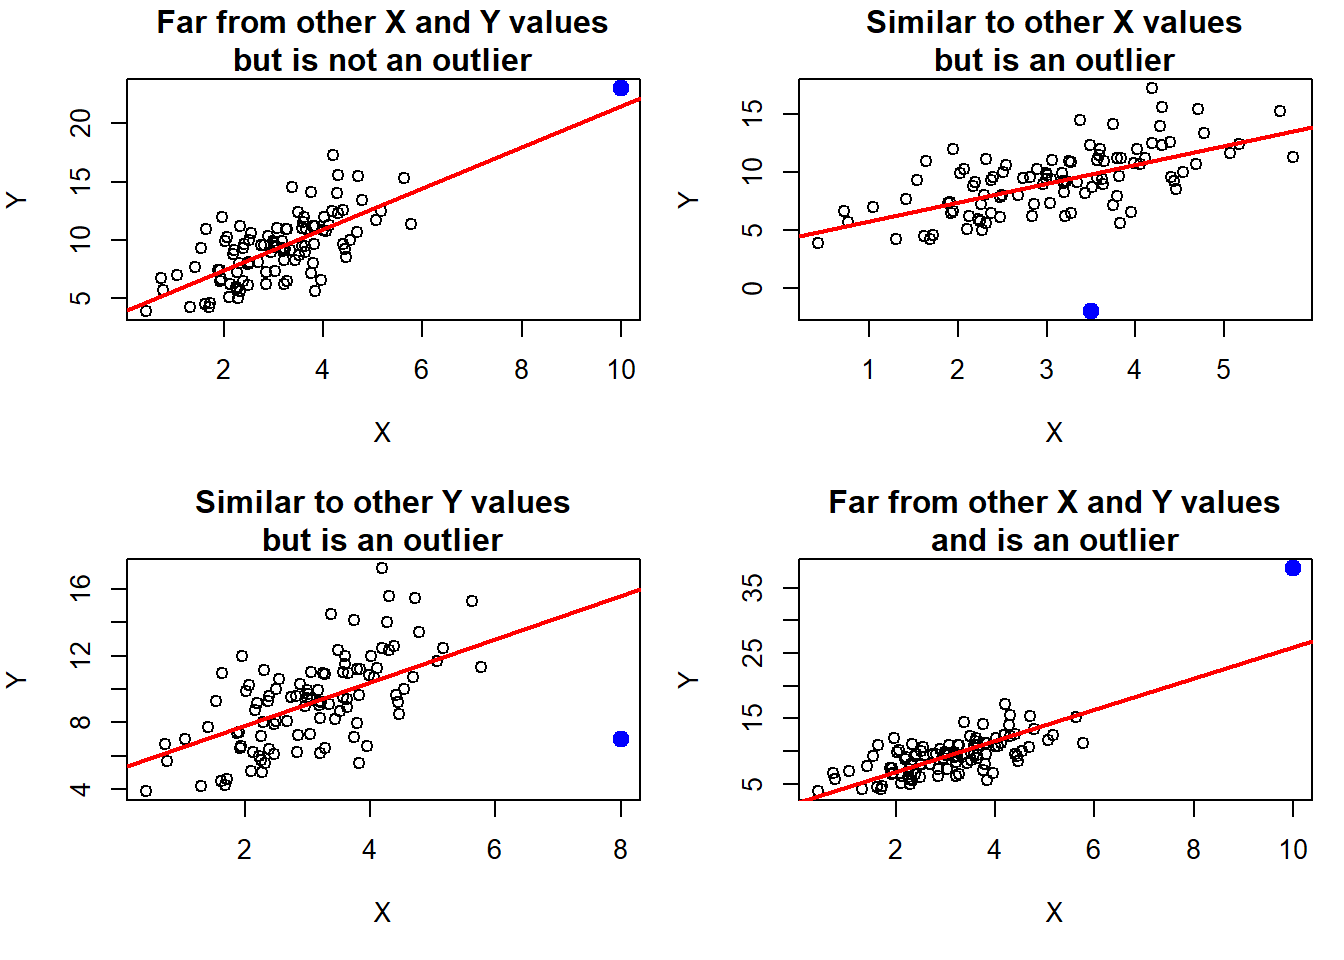

<Axes: xlabel='life_exp', ylabel='Density'>

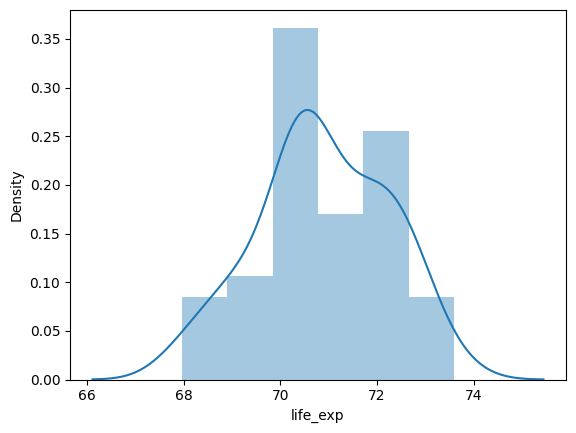

In [6]:
sns.distplot(state['life_exp'])

<Axes: ylabel='life_exp'>

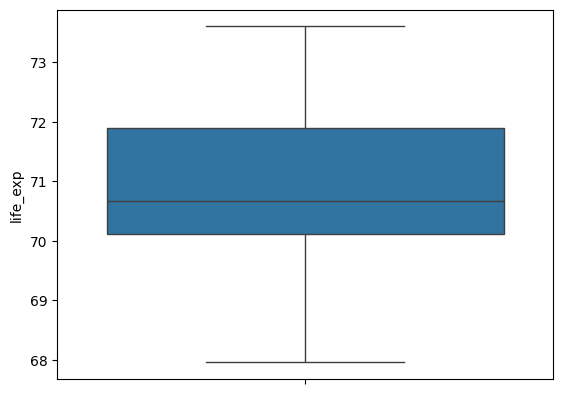

In [7]:
sns.boxplot(state['life_exp'])

-------------------------------------------------------------------------------
**Comment**

Jika dilihat sekilas nampaknya variabel dependen (Y) tidak memiliki outliers yang ekstrim, sehingga tidak perlu ditangani lebih lanjut. Namun untuk lebih memastikan maka perlu dilakukan plot scatter dari variabel dependen terhadap setiap variabel independen yang bertipe numerik.

-------------------------------------------------------------------------------

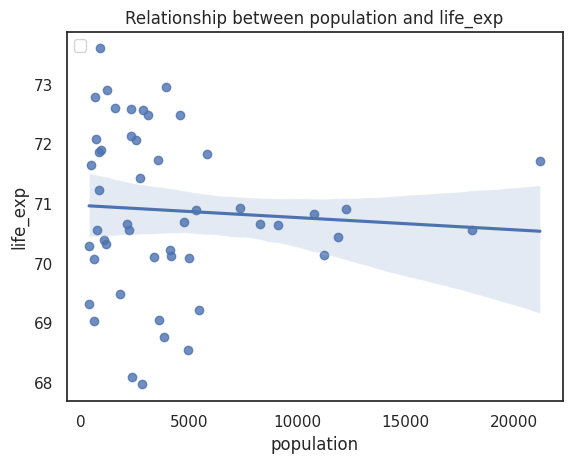

In [8]:
sns.set(style="white")
sns.regplot(x="population", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between population and life_exp")
plt.legend(loc='upper left')
plt.show()

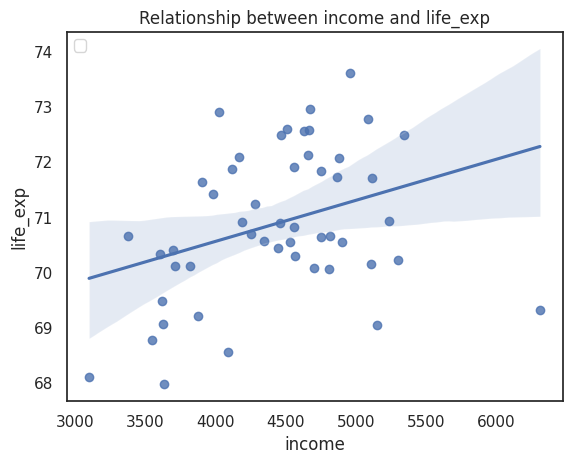

In [9]:
sns.set(style="white")
sns.regplot(x="income", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between income and life_exp")
plt.legend(loc='upper left')
plt.show()

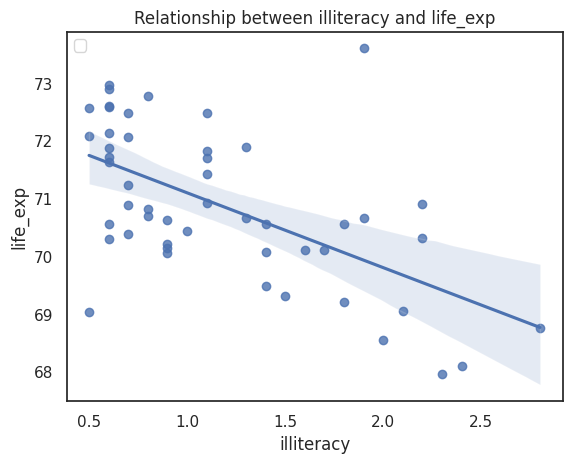

In [10]:
sns.set(style="white")
sns.regplot(x="illiteracy", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between illiteracy and life_exp")
plt.legend(loc='upper left')
plt.show()

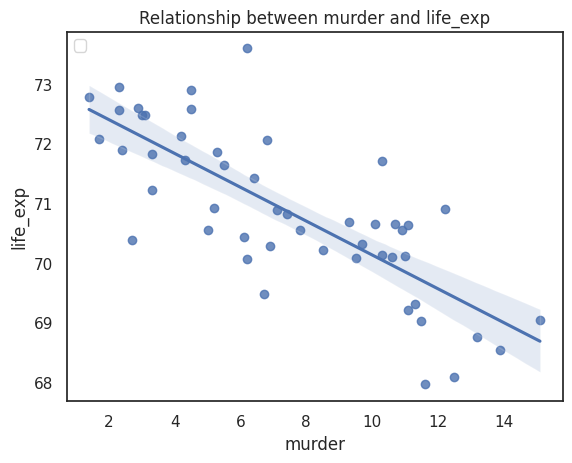

In [11]:
sns.set(style="white")
sns.regplot(x="murder", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between murder and life_exp")
plt.legend(loc='upper left')
plt.show()

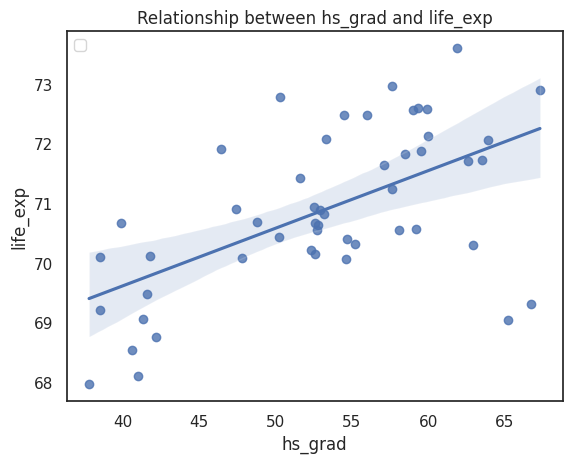

In [12]:
sns.set(style="white")
sns.regplot(x="hs_grad", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between hs_grad and life_exp")
plt.legend(loc='upper left')
plt.show()

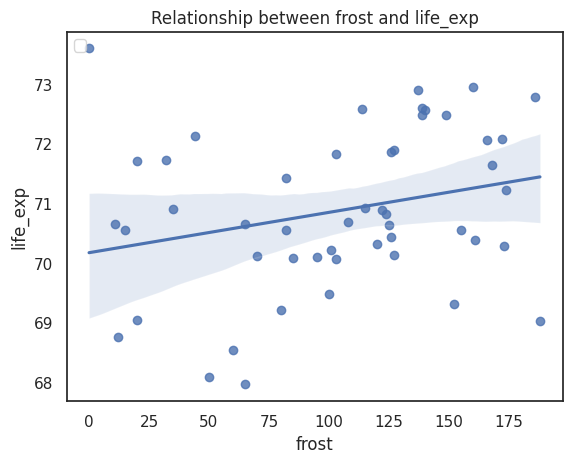

In [13]:
sns.set(style="white")
sns.regplot(x="frost", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between frost and life_exp")
plt.legend(loc='upper left')
plt.show()

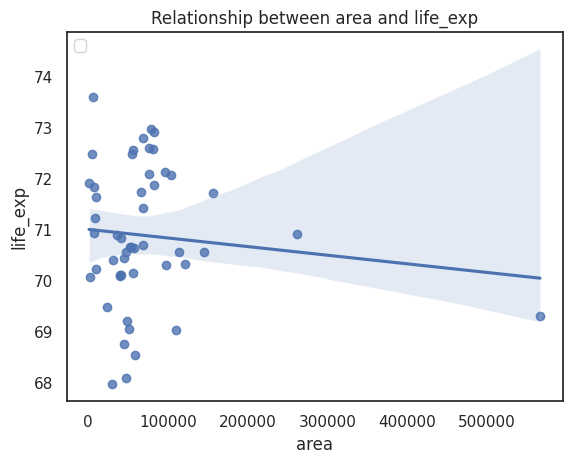

In [14]:
sns.set(style="white")
sns.regplot(x="area", y="life_exp", data=state, fit_reg=True)
plt.title("Relationship between area and life_exp")
plt.legend(loc='upper left')
plt.show()

-------------------------------------------------------------------------------
**Comment**

Jika terdapat outliers ekstrim, berikut code yang dapat digunakan untuk menangani outliers ekstrim menggunakan konsep Inter Quartile Range (IQR):

-------------------------------------------------------------------------------

In [ ]:
#Q1 = data.quantile(0.05)
#Q3 = data.quantile(0.95)
#IQR = Q3 - Q1
#print(IQR)

In [ ]:
#data_nooutlier = data.copy()
#data_nooutlier = data_nooutlier[~((data_nooutlier < (Q1 - 1.5 * IQR)) | (data_nooutlier > (Q3 + 1.5 * IQR))).any(axis=1)]
#data_nooutlier.shape

## **Exploratory Data Analysis**

### Statistic Summary

In [15]:
# numerical data
state.describe()

,population,income,illiteracy,life_exp,murder,hs_grad,frost,area
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,4246.42,4435.80,1.17,70.88,7.38,53.11,104.46,70735.88
std,4464.49,614.47,0.61,1.34,3.69,8.08,51.98,85327.30
min,365.00,3098.00,0.50,67.96,1.40,37.80,0.00,1049.00
25%,1079.50,3992.75,0.62,70.12,4.35,48.05,66.25,36985.25
50%,2838.50,4519.00,0.95,70.67,6.85,53.25,114.50,54277.00
75%,4968.50,4813.50,1.58,71.89,10.67,59.15,139.75,81162.50
max,21198.00,6315.00,2.80,73.60,15.10,67.30,188.00,566432.00


-------------------------------------------------------------------------------
**Comment**

Nilai ekstrim berdasarkan nilai minimum dan maksimum hanya terdapat pada kolom population dan area, sedangkan pada kolom lainnya tidak terdapat nilai ekstrim.

-------------------------------------------------------------------------------

In [16]:
# categorical data
state.describe(include = 'O')

,state,region,abbrv,division
count,50,50,50,50
unique,50,4,50,9
top,Alabama,South,AL,Mountain
freq,1,16,1,8


**Comment**

Region terdiri dari 4 kategori dengan South sebagai region dengan jumlah observasi terbanyak yaitu 16 observasi sedangkan division terbagi menjadi 9 kategori dengan Mountain sebagai division dengan jumlah observasi terbanyak yaitu 8 observasi.

### Correlation Matrix

In [18]:
# compute correlation
state_numeric = state.select_dtypes(include=[np.number])
state_corr = state_numeric.corr('pearson')

# generate heatmap correlation
state_corr.style.background_gradient(cmap='coolwarm')

,population,income,illiteracy,life_exp,murder,hs_grad,frost,area
population,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544
income,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315
illiteracy,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261
life_exp,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332
murder,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390
hs_grad,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542
frost,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229
area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000


-------------------------------------------------------------------------------
**Comment**

Heatmap matriks korelasi menunjukkan bahwa life_exp memiliki korelasi negatif dengan variabel murder (0.78) dan illiteracy (0.59). Sedangkan korelasi positif ditunjukkan oleh variabel hs_grad (0.58).

-------------------------------------------------------------------------------

### Numerical Visualization : Scatterplot

<Axes: xlabel='murder', ylabel='life_exp'>

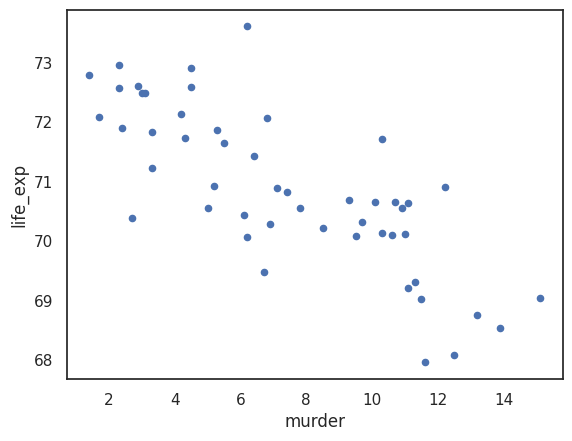

In [19]:
# generate scatter plot
life_vs_murder = state.plot.scatter('murder', 'life_exp')
life_vs_murder

-------------------------------------------------------------------------------
**Comment**

Terdapat hubungan linear negatif yang kuat antara life_exp vs murder

-------------------------------------------------------------------------------

<Axes: xlabel='illiteracy', ylabel='life_exp'>

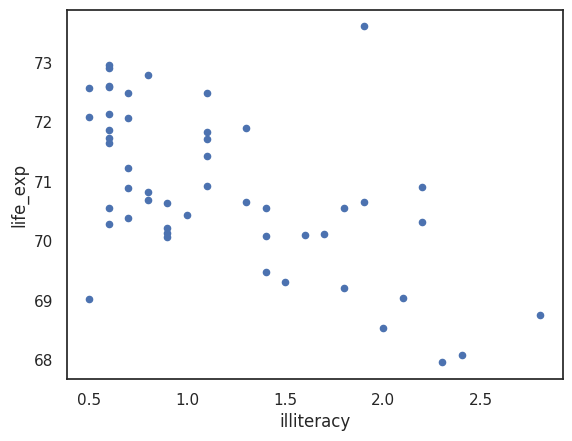

In [20]:
# generate scatter plot
life_vs_illiteracy = state.plot.scatter('illiteracy', 'life_exp')
life_vs_illiteracy

-------------------------------------------------------------------------------
**Comment**

Terdapat hubungan linear negatif yang moderate antara life_exp vs illiteracy

-------------------------------------------------------------------------------

<Axes: xlabel='hs_grad', ylabel='life_exp'>

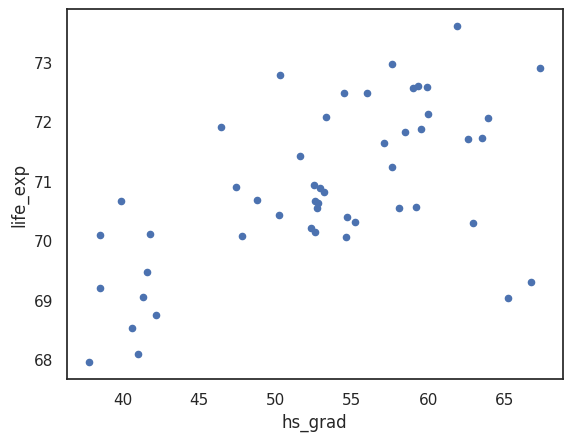

In [21]:
# generate scatter plot
life_vs_hs_grad = state.plot.scatter('hs_grad', 'life_exp')
life_vs_hs_grad

-------------------------------------------------------------------------------
**Comment**

Terdapat hubungan korelasi positif antara life_exp dan hs_grad namun tidak terlalu kuat.

-------------------------------------------------------------------------------

### Categorical Visualization : Boxplot

[Text(1, 0, 'North Central'),
 Text(2, 0, 'Northeast'),
 Text(3, 0, 'South'),
 Text(4, 0, 'West')]

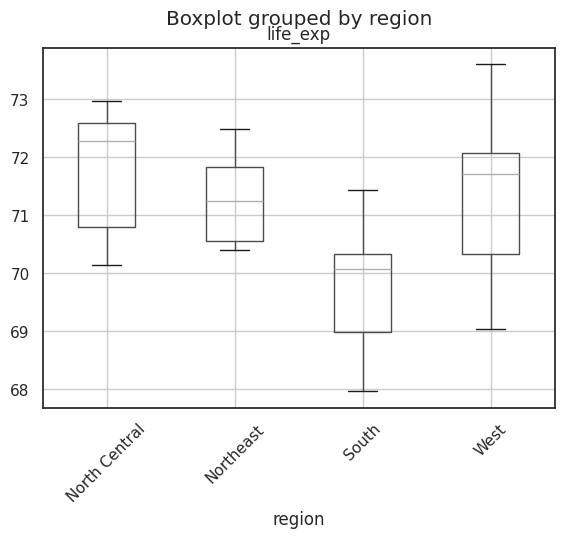

In [22]:
# generate boxplot
life_by_region = state.boxplot(column='life_exp', by='region')
life_by_region.set_xticklabels(life_by_region.get_xticklabels(), rotation=45)

-------------------------------------------------------------------------------
**Comment**

Observasi yang berada di region South nampak memiliki karakteristik yang berbeda dibandingkan dengan region lainnya.

-------------------------------------------------------------------------------

[Text(1, 0, 'East North Central'),
 Text(2, 0, 'East South Central'),
 Text(3, 0, 'Middle Atlantic'),
 Text(4, 0, 'Mountain'),
 Text(5, 0, 'New England'),
 Text(6, 0, 'Pacific'),
 Text(7, 0, 'South Atlantic'),
 Text(8, 0, 'West North Central'),
 Text(9, 0, 'West South Central')]

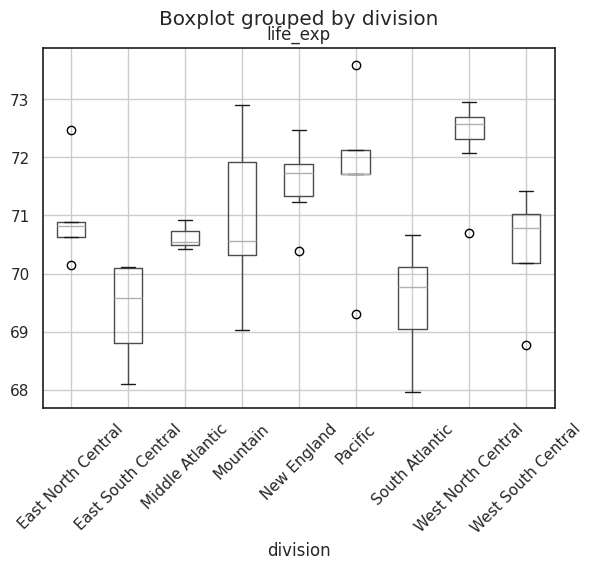

In [23]:
# generate boxplot
life_by_division = state.boxplot(column='life_exp', by='division')
life_by_division.set_xticklabels(life_by_division.get_xticklabels(), rotation=45)

-------------------------------------------------------------------------------
**Comment**

Setiap divisi memiliki distribusi data yang berbeda, namun jika dilihat dari median maka West North Central nampak memiliki karakteristik yang berbeda dibandingkan dengan division lainnya.

-------------------------------------------------------------------------------

## **Data Modelling**

### Hypothesis

-------------------------------------------------------------------------------
semua pengujian hypothesis dilakukan pada level signifikansi 5%

------------------------------------------------------------------------------

Uji-t menguji digunakan untuk menguji signifikansi parameter (koefisien) regresi secara individu

**variabel 1**

H<sub>0</sub>: murder tidak mempengaruhi life_exp (β<sub>1</sub> $=$ 0)

H<sub>1</sub>: murder mempengaruhi life_exp (β<sub>1</sub> $\neq$ 0)

**variabel 2**

H<sub>0</sub>: hs_grad tidak mempengaruhi life_exp (β<sub>2</sub> $=$ 0)

H<sub>1</sub>: hs_grad mempengaruhi life_exp (β<sub>2</sub> $\neq$ 0)

**variabel 3**

H<sub>0</sub>: illiteracy tidak mempengaruhi life_exp (β<sub>3</sub> $=$ 0)

H<sub>1</sub>: illiteracy mempengaruhi life_exp (β<sub>3</sub> $\neq$ 0)

**variabel 4**

H<sub>0</sub>: rata-rata life_exp region South tidak berbeda dengan region lainnya (μ<sub>region_South</sub> $=$ μ<sub>region_Non south</sub>)

H<sub>1</sub>: rata-rata life_exp region South berbeda dengan region lainnya (μ<sub>region_South</sub> $\neq$ μ<sub>region_Non south</sub>)

**variabel 5**

H<sub>0</sub>: rata-rata life_exp division West North Central tidak berbeda dengan division lainnya (μ<sub>division_West north central</sub> $=$ μ<sub>division_Non west north central</sub>)

H<sub>1</sub>: rata-rata life_exp division West North Central berbeda dengan division lainnya (μ<sub>division_West north central</sub> $\neq$ μ<sub>division_Non west north central</sub>)

------------------------------------------------------------------------------

### Regression Modeling

#### model 1: life_exp vs murder, hs_grad, illiteracy

In [24]:
# import statsmodels library
import statsmodels.api as sm

# variabel input/independen/prediktor
x_1 = sm.add_constant(state[['murder', 'hs_grad', 'illiteracy']])

# variabel output/dependen/target
y = state.life_exp

# fit model
model_1 = sm.OLS(y,x_1).fit()

# print summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     30.83
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           4.44e-11
Time:                        03:24:17   Log-Likelihood:                -57.610
No. Observations:                  50   AIC:                             123.2
Df Residuals:                      46   BIC:                             130.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.7354      1.222     57.063      0.0

-------------------------------------------------------------------------------
**Comment**

variabel illiteracy tidak signifikan pada level signifikansi 5% karena p-value = 0.409 > 0.05, sehingga tidak cukup bukti untuk menolak hipotesis nol. Karena illiteracy tidak signifikan, maka illiteracy dapat dikeluarkan dari model sebelum fitting ulang dilakukan.

-------------------------------------------------------------------------------

#### model 2: life_exp vs murder, hs_grad

In [25]:
# variabel input/independen/prediktor
x_2 = sm.add_constant(state[['murder', 'hs_grad']])

# variabel output/dependen/target
y = state.life_exp

# fit model
model_2 = sm.OLS(y,x_2).fit()

# print summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     46.20
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           8.02e-12
Time:                        03:24:21   Log-Likelihood:                -57.984
No. Observations:                  50   AIC:                             122.0
Df Residuals:                      47   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.2971      1.016     69.213      0.0

-------------------------------------------------------------------------------
**Comment**

Berdasarkan uji-t, murder dan hs_grad masing-masing berpengaruh terhadap life_exp pada level signifikansi 5% karena p-value **P>|t|** < 0.05, sehingga cukup bukti untuk menolak hipotesis nol.

Berdasarkan uji-F, setidaknya satu dari independent variabel (murder dan hs_grad) berpengaruh terhadap life_exp pada level signifikansi 5% karena p-value **Prob (F-statistic)** = 8.02e-12 < 0.05, sehingga cukup bukti untuk menolak hipotesis nol. Artinya penambahan independent variable (murder dan hs_grad) ke dalam model lebih mampu menjelasakan keragaman dibandingkan model tanpa independent variable.

Nilai Adj. R-squared sebesar 0.648 cukup baik mengindikasikan bahwa 64.8% variabilitas dari life_exp diantara observasi (US States) dapat dijelaskan oleh model.

-------------------------------------------------------------------------------

#### model 3: life_exp vs region_South, division_West North Central

**One-hot Encoding**

One-hot encoding diperlukan dalam pemodelan menggunakan data kategorik. Secara teknis, one-hot encoding memecah satu kolom menjadi beberapa kolom dummy berdasarkan nilai kategorinya. Jumlah kolom yang dihasilkan one-hot encoding adalah sebanyak jumlah kategori. Nilai dari kolom hasil one-hot encoding adalah 1 atau 0, 1 jika observasi (baris data) berasal dari kategori tersebut dan 0 jika bukan.

Sebagai contoh, jika kolom kota berisi kategori 'Jakarta', 'Bogor', Tangsel', maka onehot encoding akan memecah kolom tersebut menjadi 3 kolom yaitu kota_Jakarta, kota_Bogor, dan kota_Tangsel dengan detail nilai kolom sebagai berikut:

*   Jika suatu observasi (baris) memiliki kategori 'Jakarta' maka nilai dari kolom kota_Jakarta pada observasi tersebut akan berisi 1, jika bukan Jakarta maka berisi 0.
*   Jika suatu observasi (baris) memiliki kategori 'Bogor' maka nilai dari kolom kota_Bogor pada observasi tersebut akan berisi 1, jika bukan Bogor maka berisi 0.
*   Jika suatu observasi (baris) memiliki kategori 'Tangsel' maka nilai dari kolom kota_Tangsel pada observasi tersebut akan berisi 1, jika bukan Tangsel maka berisi 0.

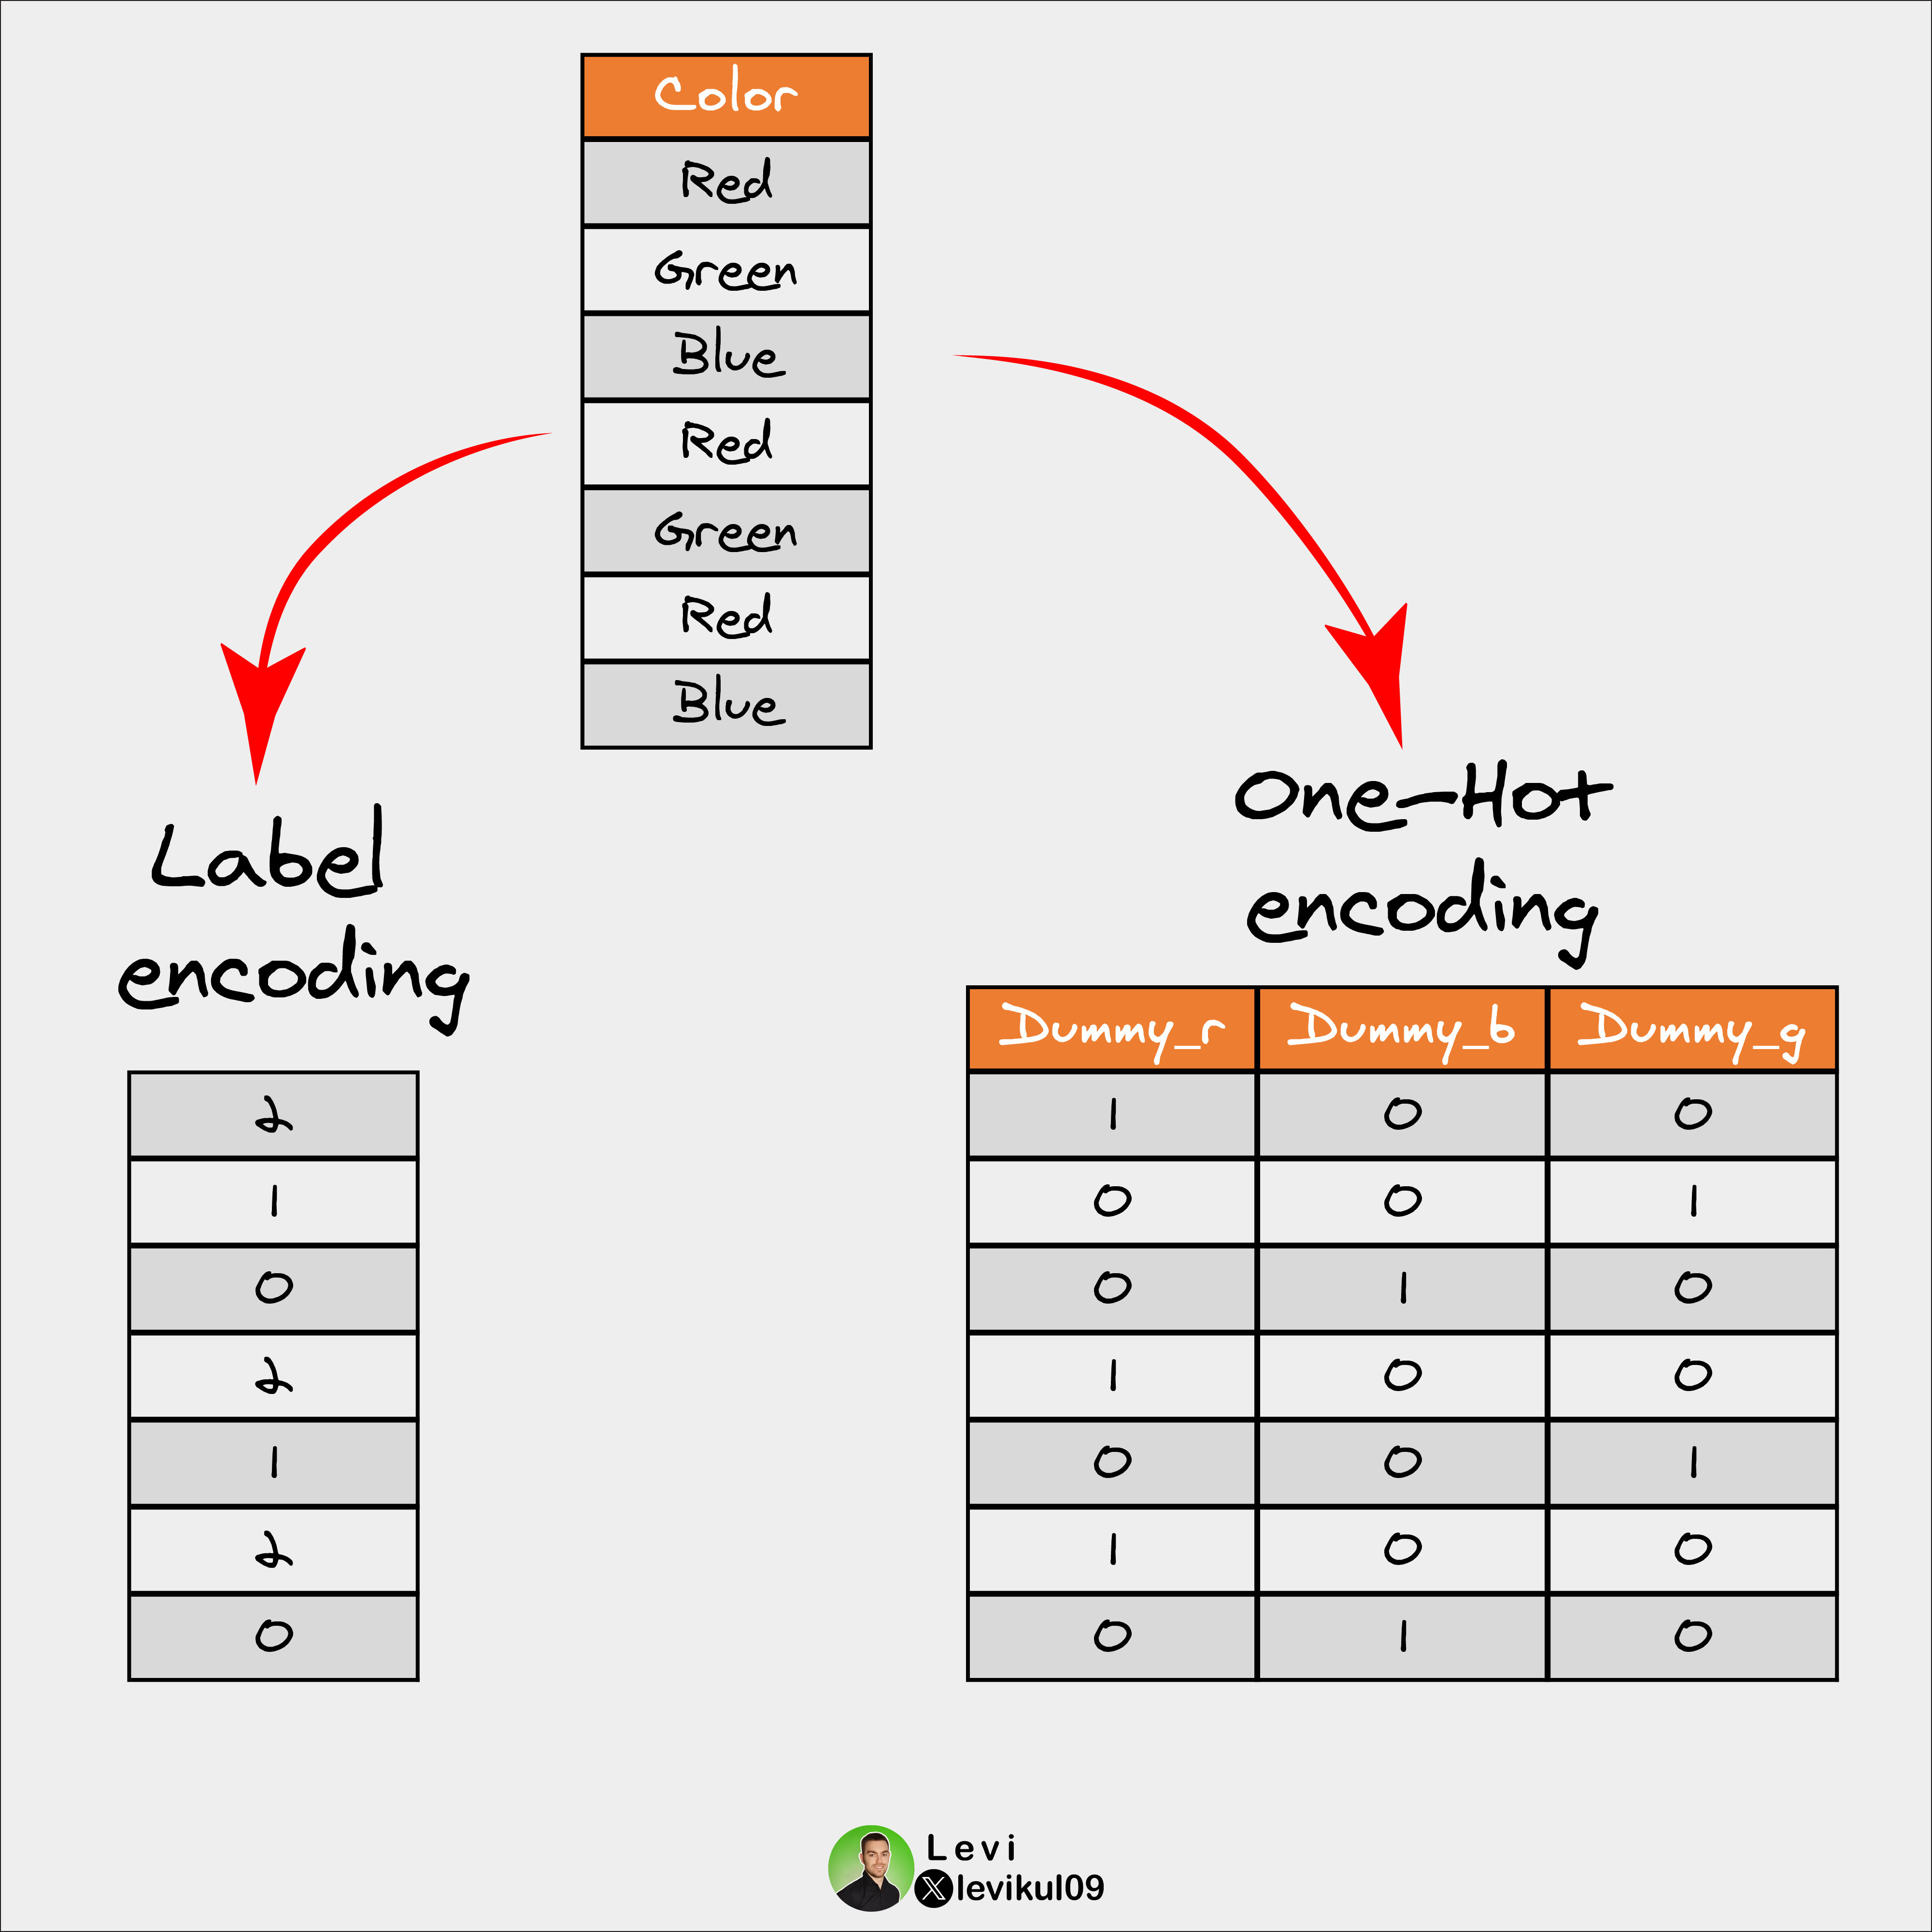

In [26]:
# one hot encoding for categorical variables
state_onehot = pd.get_dummies(state, columns=['region', 'division'], drop_first=False)
state_onehot.head(5)

,state,abbrv,population,income,illiteracy,life_exp,murder,hs_grad,frost,area,...,region_West,division_East North Central,division_East South Central,division_Middle Atlantic,division_Mountain,division_New England,division_Pacific,division_South Atlantic,division_West North Central,division_West South Central
0,Alabama,AL,3615,3624,2.10,69.05,15.10,41.30,20,50708,...,False,False,True,False,False,False,False,False,False,False
1,Alaska,AK,365,6315,1.50,69.31,11.30,66.70,152,566432,...,True,False,False,False,False,False,True,False,False,False
2,Arizona,AZ,2212,4530,1.80,70.55,7.80,58.10,15,113417,...,True,False,False,False,True,False,False,False,False,False
3,Arkansas,AR,2110,3378,1.90,70.66,10.10,39.90,65,51945,...,False,False,False,False,False,False,False,False,False,True
4,California,CA,21198,5114,1.10,71.71,10.30,62.60,20,156361,...,True,False,False,False,False,False,True,False,False,False


In [28]:
# variabel input/independen/prediktor
x_3 = sm.add_constant(state_onehot[['region_South', 'division_West North Central']].astype(int))

# variabel output/dependen/target
y = state.life_exp

# fit model
model_3 = sm.OLS(y,x_3).fit()

# print summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     18.88
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           9.58e-07
Time:                        03:25:02   Log-Likelihood:                -70.421
No. Observations:                  50   AIC:                             146.8
Df Residuals:                      47   BIC:                             152.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

-------------------------------------------------------------------------------
**Comment**

Berdasarkan uji-t, region_South dan division_West North Central masing-masing memiliki rata-rata life_exp yang berbeda dengan region dan division lainnya pada level signifikansi 5% karena p-value **P>|t|** < 0.05, sehingga cukup bukti untuk menolak hipotesis nol.

Berdasarkan uji-F, setidaknya satu dari independent variabel (region_South dan division_West Central North) berpengaruh terhadap life_exp pada level signifikansi 5% karena p-value **Prob (F-statistic)** = 9.58e-07 < 0.05, sehingga cukup bukti untuk menolak hipotesis nol. Artinya penambahan independent variable (region_South dan division_West Central North) ke dalam model lebih mampu menjelasakan keragaman dibandingkan model tanpa independent variable.

Nilai Adj. R-squared sebesar 0.422 mengindikasikan bahwa hanya 42.2% variabilitas dari life_exp diantara observasi (US States) dapat dijelaskan oleh model.

-------------------------------------------------------------------------------

#### model 4: life_exp vs murder, hs_grad, region_South, division_West North Central

In [30]:
# variabel input/independen/prediktor
x_4 = sm.add_constant(state_onehot[['murder', 'hs_grad', 'region_South', 'division_West North Central']].astype(int))

# variabel output/dependen/target
y = state.life_exp

# fit model
model_4 = sm.OLS(y,x_4).fit()

# print summary
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     22.66
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.66e-10
Time:                        03:26:15   Log-Likelihood:                -57.583
No. Observations:                  50   AIC:                             125.2
Df Residuals:                      45   BIC:                             134.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

-------------------------------------------------------------------------------
**Comment**

Tidak terdapat perbedaan yang nyata antara nilai rata-rata life_exp dari kategorikal variabel (region_South, division_West North Central) karena masing-masing p-value **(P>|t|)** > 0.05 sehingga tidak cukup bukti untuk menolak hipotesis nol.

-------------------------------------------------------------------------------

### Model Evaluation

Berdasarkan nilai-nilai uji-t, uji-F, dan adj. R-squared, maka model yang dipilih sebagai model terbaik dalam analisis ini adalah model 2 (life_exp vs murder, hs_grade) karena beberapa hal berikut


1.   Semua variabel independent (murder, hs_grade) berpengaruh signifikan terhadap variabel response (life_exp) pada level signifikansi 5% berdasarkan uji-t.
2.   Model dengan variabel independent (murder, hs_grade) mampu menjelaskan keragaman life_exp dibanding model tanpa variabel independent pada level signifikansi 5% berdasarkan uji-F.
3. Nilai adj R-squared = 0.648% menggambarkan kemampuan model dalam menjelaskan keragaman life_exp sebesar 64.8%, lebih besar dibandingkan model 3 (life_exp vs region_South, division_West North Central) yang hanya mampu menjelaskan 42,2% keragaman life_exp.





## **Assumptions Checking**

Pemeriksaan asumsi dilakukan terhadap nilai residual dari setiap pengamatan, sehingga perlu terlebih dahulu untuk menghitung nilai residual dengan formula nilai pengamatan - nilai prediksi.

In [31]:
# import matplotlib library
import matplotlib.pyplot as plt

# import qqplot from statsmodel library
from statsmodels.graphics.gofplots import qqplot

# compute fitted values (y_pred)
fitted_values = model_2.fittedvalues

# compute residuals
residuals = model_2.resid

#### Normalitas

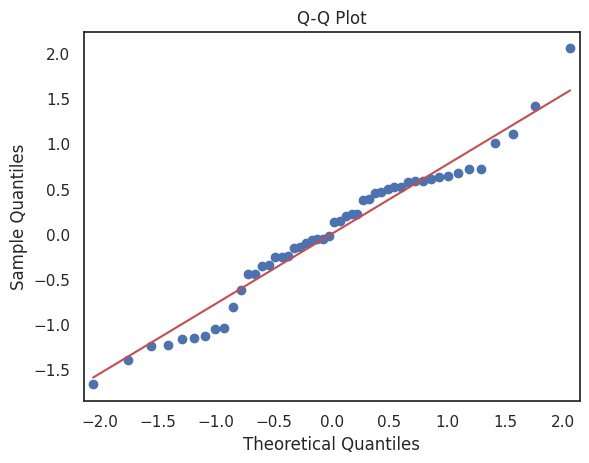

In [32]:
# generate qqplot
qqplot(residuals, line='s')  # 's' for standardized line
plt.title('Q-Q Plot')
plt.show()

-------------------------------------------------------------------------------
**Comment**

Meskipun tidak semua nilai residual berada pada garis lurus namun sebagian besar nilai residual masih berada pada garis lurus, sehingga dapat disimpulkan memenuhi asumsi kenormalan.

-------------------------------------------------------------------------------

#### Homoskedastisitas

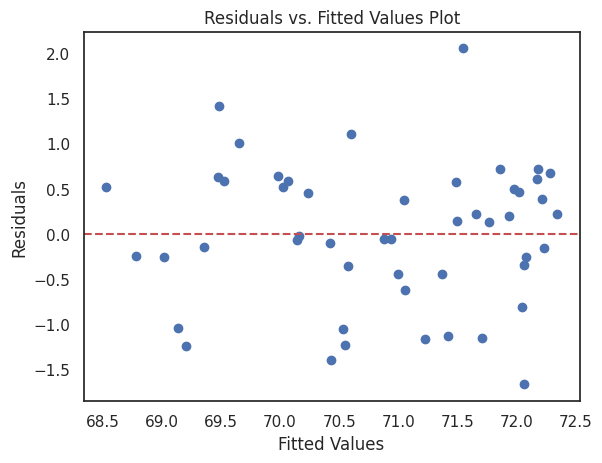

In [33]:
# generate Residuals vs. Fitted Values
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Garis horizontal pada y=0
plt.show()


-------------------------------------------------------------------------------
**Comment**

Nilai residuals tersebar secara acak disekitar nilai nol dengan varian konstan mengindikasikan memenuhi asumsi homoskedastisitas.

-------------------------------------------------------------------------------

#### Identifikasi Struktur Non-Acak

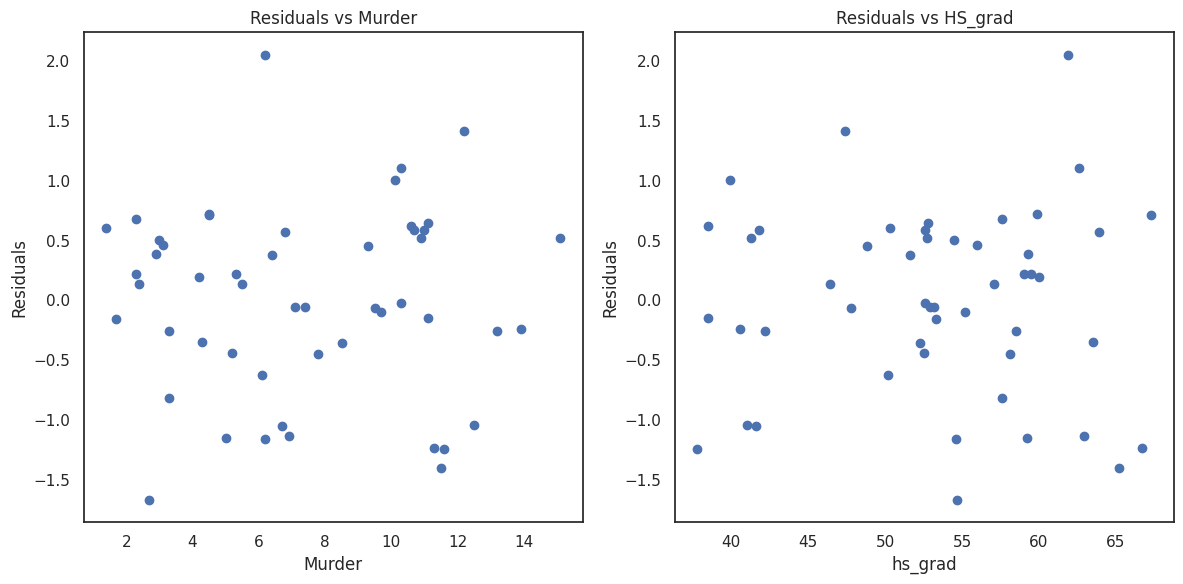

In [34]:
# slice independent variables
murder = state['murder']
hs_grad = state['hs_grad']

# setting canvas layout
plt.figure(figsize=(12, 6))

# generate plot residuals vs Murder
plt.subplot(1, 2, 1)
plt.scatter(murder, residuals)
plt.xlabel('Murder')
plt.ylabel('Residuals')
plt.title('Residuals vs Murder')

# generate plot residuals vs hs_grad
plt.subplot(1, 2, 2)
plt.scatter(hs_grad, residuals)
plt.xlabel('hs_grad')
plt.ylabel('Residuals')
plt.title('Residuals vs HS_grad')

# show plot
plt.tight_layout()
plt.show()

**Comment**

Nilai residuals tersebar secara acak disekitar nilai nol mengindikasikan model regresi mampu menangkap struktur non acak dalam data.

#### Independensi/Bebas Autokorelasi

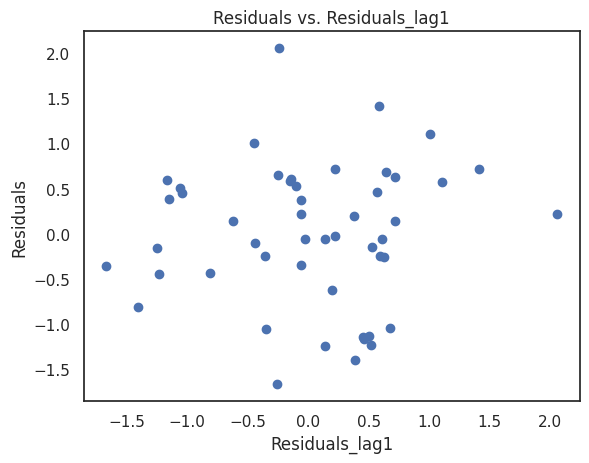

In [35]:
import numpy as np

# compute lag 1 from residuals
residuals_lag1 = np.roll(residuals, 1)[1:]

# generate residuals vs residuals_lag1
plt.scatter(residuals_lag1, residuals[1:])
plt.xlabel('Residuals_lag1')
plt.ylabel('Residuals')
plt.title('Residuals vs. Residuals_lag1')
plt.show()

**Comment**

Residuals tidak berkorelasi dengan residuals_lag1 terlihat dari plot yang tidak membentuk pola linear (garis lurus), sehingga memenuhi asumsi independensi residual.

## **Model Interpretation**

Berdasarkan hasil uji-t, uji-F, dan nilai adj R-squared, dapat disimpulkan bahwa model terbaik untuk memodelkan hubungan antara life_exp dengan beberapa variabel independen yang ada dalam data adalah

y = β<sub>0</sub> + β<sub>1</sub>murder + β<sub>2</sub>hs_grad

sesuai dengan output regresi pada model_2, persamaan regresi menjadi

y = 70.3 - 0.24murder + 0.04hs_grad

sehingga dapat diinterpretasikan sebagai berikut:

**intercept**

ketika murder dan hs_grad rates adalah 0%, maka rata-rata life_exp diantara negara-negara bagian (States) di USA diharapkan sebesar 70.3 tahun.

**slope**

Dengan mempertimbangkan nilai variabel hs_grad konstan, maka untuk setiap kenaikan 1% murder rate diharapkan akan menurunkan rata-rata life_exp sebesar 0.24 tahun.

Dengan mempertimbangkan nilai variabel murder konstan, maka untuk setiap kenaikan 1% hs_grad rate diharapkan akan meningkatkan rata-rata life_exp sebesar 0.04 tahun.